In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 69.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!pip install wordcloud

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
import spacy
nlp= spacy.load('en_core_web_sm')

Data Exploration and Preprocessing

In [ ]:
df=pd.read_csv('blogs.csv')

In [ ]:
df.shape

(2000, 2)

In [ ]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [ ]:
df.tail()

,Data,Labels
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1999,Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...,talk.religion.misc


In [ ]:
df['len']=df.Data.apply(len)

In [ ]:
df

,Data,Labels,len
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,5972
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1336
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,3116
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,15910
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,3264
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,5263
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,1771
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,2192
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,3197


In [ ]:
import re

In [ ]:
### Data Cleaning
def data_clean(text):
  text1=' '.join(re.findall('\w+',text))
  doc=nlp(text1)
  clean_data=[token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_digit and not token.is_bracket and not token.is_currency]
  return clean_data

<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-377970763.py:3: SyntaxWarning: invalid escape sequence '\w'
  text1=' '.join(re.findall('\w+',text))


In [ ]:
count=CountVectorizer(analyzer=data_clean)
x= count.fit_transform(df['Data'])

In [ ]:
x.shape

(2000, 46583)

In [ ]:
tfidf=TfidfTransformer()
y=tfidf.fit_transform(x)


In [ ]:
y.shape

(2000, 46583)

Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report
multi=MultinomialNB()
multi.fit(y, df['Labels'])

MultinomialNB()

Evaluation

In [ ]:
y_pred= multi.predict(y)
accuracy_score(df['Labels'],y_pred)

0.984

In [ ]:
print(classification_report(df['Labels'],y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.93      0.97      0.95       100
           comp.graphics       0.99      0.98      0.98       100
 comp.os.ms-windows.misc       1.00      1.00      1.00       100
comp.sys.ibm.pc.hardware       0.96      1.00      0.98       100
   comp.sys.mac.hardware       1.00      0.99      0.99       100
          comp.windows.x       1.00      1.00      1.00       100
            misc.forsale       0.97      0.99      0.98       100
               rec.autos       1.00      1.00      1.00       100
         rec.motorcycles       1.00      1.00      1.00       100
      rec.sport.baseball       1.00      0.99      0.99       100
        rec.sport.hockey       0.99      1.00      1.00       100
               sci.crypt       0.99      1.00      1.00       100
         sci.electronics       1.00      0.95      0.97       100
                 sci.med       0.99      0.97      0.98       100
         

Naive Bayes Model for Text Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
x_train,x_test,y_train,y_test=train_test_split(df['Data'],df['Labels'],train_size=0.75,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500,)
(500,)
(1500,)
(500,)


In [ ]:
pipeline=Pipeline([('count',CountVectorizer(analyzer=data_clean)),('tfidf',TfidfTransformer()),('multi',MultinomialNB())])

In [ ]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('count',
                 CountVectorizer(analyzer=<function data_clean at 0x7c8b7d014b80>)),
                ('tfidf', TfidfTransformer()), ('multi', MultinomialNB())])

In [ ]:
y_pred=pipeline.predict(x_test)

Evaluation

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_pred)

0.816

In [ ]:
print(classification_report(y_test,y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.62      0.95      0.75        19
           comp.graphics       0.84      0.57      0.68        28
 comp.os.ms-windows.misc       0.93      0.93      0.93        29
comp.sys.ibm.pc.hardware       0.71      0.77      0.74        26
   comp.sys.mac.hardware       0.60      0.82      0.69        22
          comp.windows.x       0.81      0.74      0.77        23
            misc.forsale       0.86      0.79      0.83        24
               rec.autos       0.83      0.71      0.77        28
         rec.motorcycles       0.85      0.85      0.85        20
      rec.sport.baseball       0.79      0.92      0.85        24
        rec.sport.hockey       0.93      0.81      0.86        31
               sci.crypt       0.86      1.00      0.93        25
         sci.electronics       0.88      0.64      0.74        22
                 sci.med       0.95      0.72      0.82        25
         

In [ ]:
df1=[i.strip () for i in df.Data]
text=' '.join(df1)

In [ ]:
sentence=sent_tokenize(text)

In [ ]:
sent_df=pd.DataFrame(sentence,columns=['sentence'])

In [ ]:
sent_df.head()

,sentence
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
1,"#|> \n#|> No, but it allows one to conclude th..."
2,"#\n#""Motivates"" or ""allows?"""
3,The Christian Bible says that one may kill\n#u...
4,"In fact, it instructs one to kill under\n#cert..."


Sentiment Analysis

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
def vader_sent(sentence):
    sent=SentimentIntensityAnalyzer()
    return sent.polarity_scores(sentence)['compound']

In [ ]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)

In [ ]:
sent_df['vader_sent']= sent_df['sentence'].apply(vader_sent)

In [ ]:
sent_df.head()

,sentence,word_count,vader_sent
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,94,-0.8469
1,"#|> \n#|> No, but it allows one to conclude th...",32,-0.8402
2,"#\n#""Motivates"" or ""allows?""",4,0.0000
3,The Christian Bible says that one may kill\n#u...,11,-0.5574
4,"In fact, it instructs one to kill under\n#cert...",10,-0.6908


Sentiment which are Negative

In [ ]:
sent_df[sent_df.vader_sent<0]

,sentence,word_count,vader_sent
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,94,-0.8469
1,"#|> \n#|> No, but it allows one to conclude th...",32,-0.8402
3,The Christian Bible says that one may kill\n#u...,11,-0.5574
4,"In fact, it instructs one to kill under\n#cert...",10,-0.6908
5,I'd say the majority of people have a moral sy...,18,-0.5574
...,...,...,...
33916,"I may sound\n>paranoid, but our government is ...",24,-0.7964
33917,"A spurious analogy, especially for one so skep...",10,-0.4572
33918,"The Davidians were NOT drug dealers, and by al...",16,-0.4019
33920,"Bill R.\n\n--\n\n""When up a dangerous faction ...",35,-0.5267


Sentiment Which are Nuteral

In [ ]:
sent_df[sent_df.vader_sent==0]

,sentence,word_count,vader_sent
2,"#\n#""Motivates"" or ""allows?""",4,0.0
8,"When you talk about\nChristianity, or Islam, t...",15,0.0
9,It's when people go to a general statement abo...,14,0.0
11,"#\n#|> For my part, I conclude that something\...",13,0.0
14,Not necessarily.,2,0.0
...,...,...,...
33911,Think about this: I am a drug\n>dealer and my ...,17,0.0
33912,They call me and\n>tell me that the Feds are o...,17,0.0
33914,"Now, instead of\n>the Feds, in comes my compet...",12,0.0
33915,The only\n>acceptable answer to a no-knock war...,11,0.0


Sentiment which are Positive

In [ ]:
sent_df[sent_df.vader_sent>0]

,sentence,word_count,vader_sent
6,I do get your distinction between\nmotivate an...,28,0.7184
7,But it rather\ndepends on what the 'certain ci...,10,0.3919
10,One could believe in a God which instructs one...,13,0.5256
15,"""Love thy neighbour"" does not supply a them/us...",12,0.6369
20,That was religously motivated.,4,0.4588
...,...,...,...
33905,"The first question is, ""Did the 'tip-off' call...",36,0.1027
33907,I'd like to see both of these questions answer...,19,0.3612
33909,">Okay, what about the fact that they were tipp...",18,0.2584
33922,"When such a tempest shook the land,\nHow could...",13,0.3400


Evaluation

In [ ]:
import seaborn as sns

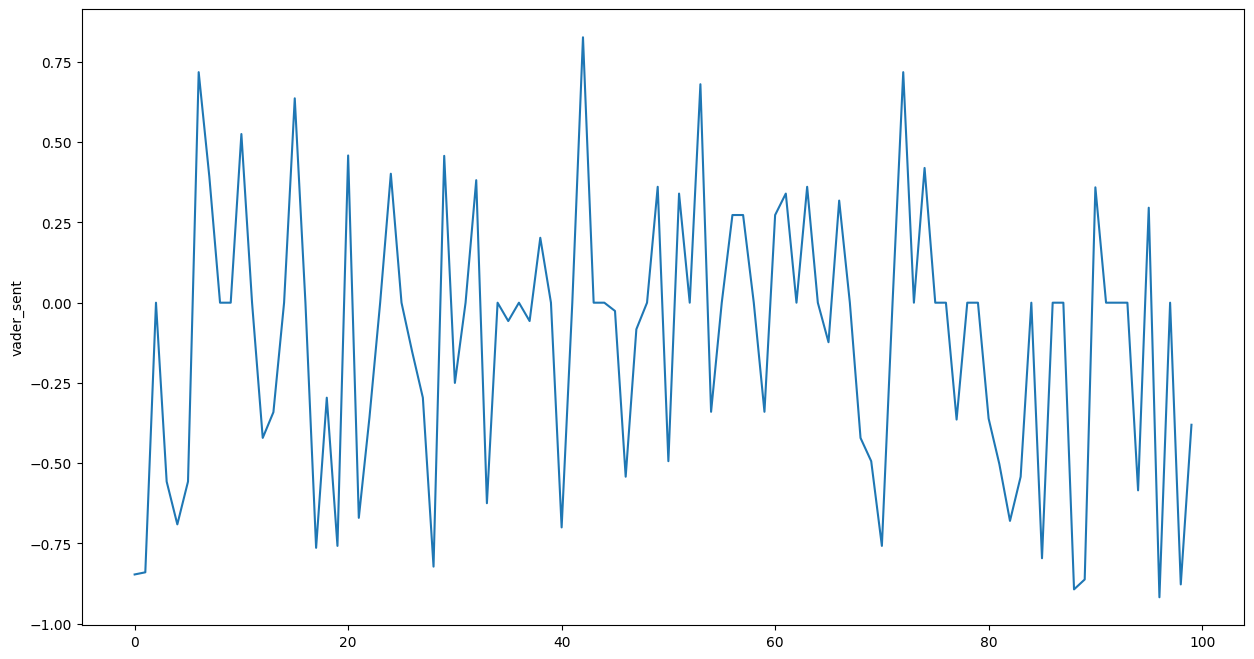

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data=sent_df.head(100), x=range(len(sent_df.head(100))), y='vader_sent')
plt.show()


In [ ]:
from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0.05:
        return "Positive"
    elif polarity < -0.05:
        return "Negative"
    else:
        return "Neutral"

df['Sentiment'] = df['Data'].apply(get_sentiment)

In [ ]:
print(df['Sentiment'].value_counts())

Sentiment
Positive    1192
Neutral      542
Negative     266
Name: count, dtype: int64


Evaluation

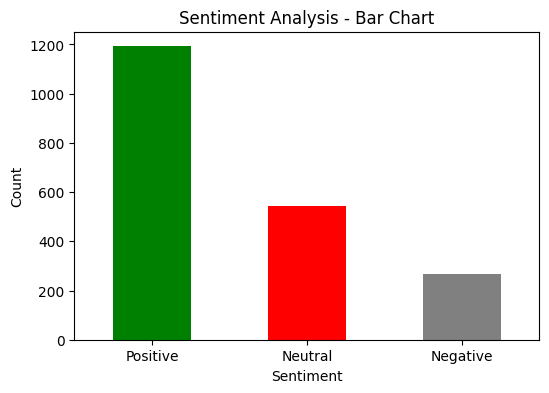

In [ ]:
sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar', color=['green','red','gray'])
plt.title("Sentiment Analysis - Bar Chart")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()